<a href="https://colab.research.google.com/github/TalOzeri/Final-project-ML/blob/main/FIFA_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ייבוא ספריות

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
import pickle
warnings.filterwarnings('ignore')

##טעינת קובץ csv והצגתו

In [2]:
player_data = pd.read_csv("/content/drive/MyDrive/google colab/פרויקט גמר/players_22.csv")

In [3]:
player_data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
player_data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [5]:
player_data.shape

(19239, 110)

In [6]:
player_data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [7]:
player_data['club_position'].value_counts()

SUB    8299
RES    3168
RCB     701
GK      701
LCB     701
RB      515
LB      515
ST      476
RCM     470
LCM     470
LM      410
RM      410
CAM     292
LDM     223
RDM     223
LS      223
RS      223
CB      186
RW      185
LW      185
CDM     168
RWB     116
LWB     116
CM       83
RF       35
LF       35
LAM      21
RAM      21
CF        7
Name: club_position, dtype: int64

נבחין כי יש 701 שוערים, וב -FIFA
 לשוערים יש סטטים שונים משאר השחקנים ולכן במודל זה נוריד את השוערים

In [8]:
player_data = player_data[player_data.club_position != 'GK']


In [9]:
player_data['club_position'].value_counts()

SUB    8299
RES    3168
LCB     701
RCB     701
LB      515
RB      515
ST      476
LCM     470
RCM     470
LM      410
RM      410
CAM     292
RDM     223
LDM     223
LS      223
RS      223
CB      186
RW      185
LW      185
CDM     168
RWB     116
LWB     116
CM       83
RF       35
LF       35
LAM      21
RAM      21
CF        7
Name: club_position, dtype: int64

אנו לא צריכים את כל 110 סוגי הנתונים שיש לנו ולכן נבחר רק את הנתונים האישיים של השחקנים בתחום הספורטיבי כמו מהירות, שליטה בכדור וכו' ונוותר על נתונים כמו שם, מדינה, שם קבוצה

In [10]:
columns = ['overall', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 
                 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
                 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
                 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',]
player_df = player_data[columns]

In [11]:
player_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,18538.0,65.626928,6.852998,47.0,61.0,66.0,70.0,93.0
weak_foot,18538.0,2.960891,0.666342,1.0,3.0,3.0,3.0,5.0
skill_moves,18538.0,2.403603,0.734710,1.0,2.0,2.0,3.0,5.0
pace,17107.0,68.213071,10.933155,28.0,62.0,69.0,76.0,97.0
shooting,17107.0,52.345297,14.051623,18.0,42.0,54.0,63.0,94.0
passing,17107.0,57.312562,10.068965,25.0,51.0,58.0,64.0,93.0
dribbling,17107.0,62.561174,9.651312,27.0,57.0,64.0,69.0,95.0
defending,17107.0,51.703630,16.189746,14.0,37.0,56.0,64.0,91.0
physic,17107.0,64.823289,9.791886,29.0,59.0,66.0,72.0,90.0
attacking_crossing,18538.0,50.901122,16.996402,6.0,40.0,55.0,64.0,94.0


In [12]:
player_df.isna().sum()

overall                           0
weak_foot                         0
skill_moves                       0
pace                           1431
shooting                       1431
passing                        1431
dribbling                      1431
defending                      1431
physic                         1431
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power                  0
power_jumping                     0
power_stamina                     0
power_strength              

נבחין כי יש לנו 1431 נתונים חסרים בערכים: pace, shooting, passing, dribbling, defending, physic ולכן נצבע הורדה לש השורות עם הערכים החסרים מכיוון שערכים אלו הם החשובים ביותר במערך.

In [13]:
player_df.dropna(inplace=True)
player_df.isna().sum()

overall                        0
weak_foot                      0
skill_moves                    0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_

In [14]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17107 entries, 0 to 19238
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      17107 non-null  int64  
 1   weak_foot                    17107 non-null  int64  
 2   skill_moves                  17107 non-null  int64  
 3   pace                         17107 non-null  float64
 4   shooting                     17107 non-null  float64
 5   passing                      17107 non-null  float64
 6   dribbling                    17107 non-null  float64
 7   defending                    17107 non-null  float64
 8   physic                       17107 non-null  float64
 9   attacking_crossing           17107 non-null  int64  
 10  attacking_finishing          17107 non-null  int64  
 11  attacking_heading_accuracy   17107 non-null  int64  
 12  attacking_short_passing      17107 non-null  int64  
 13  attacking_volley

In [15]:
player_df.shape

(17107, 38)

#נציג היסטוגרמה שתראה את התפלגות הנתונים

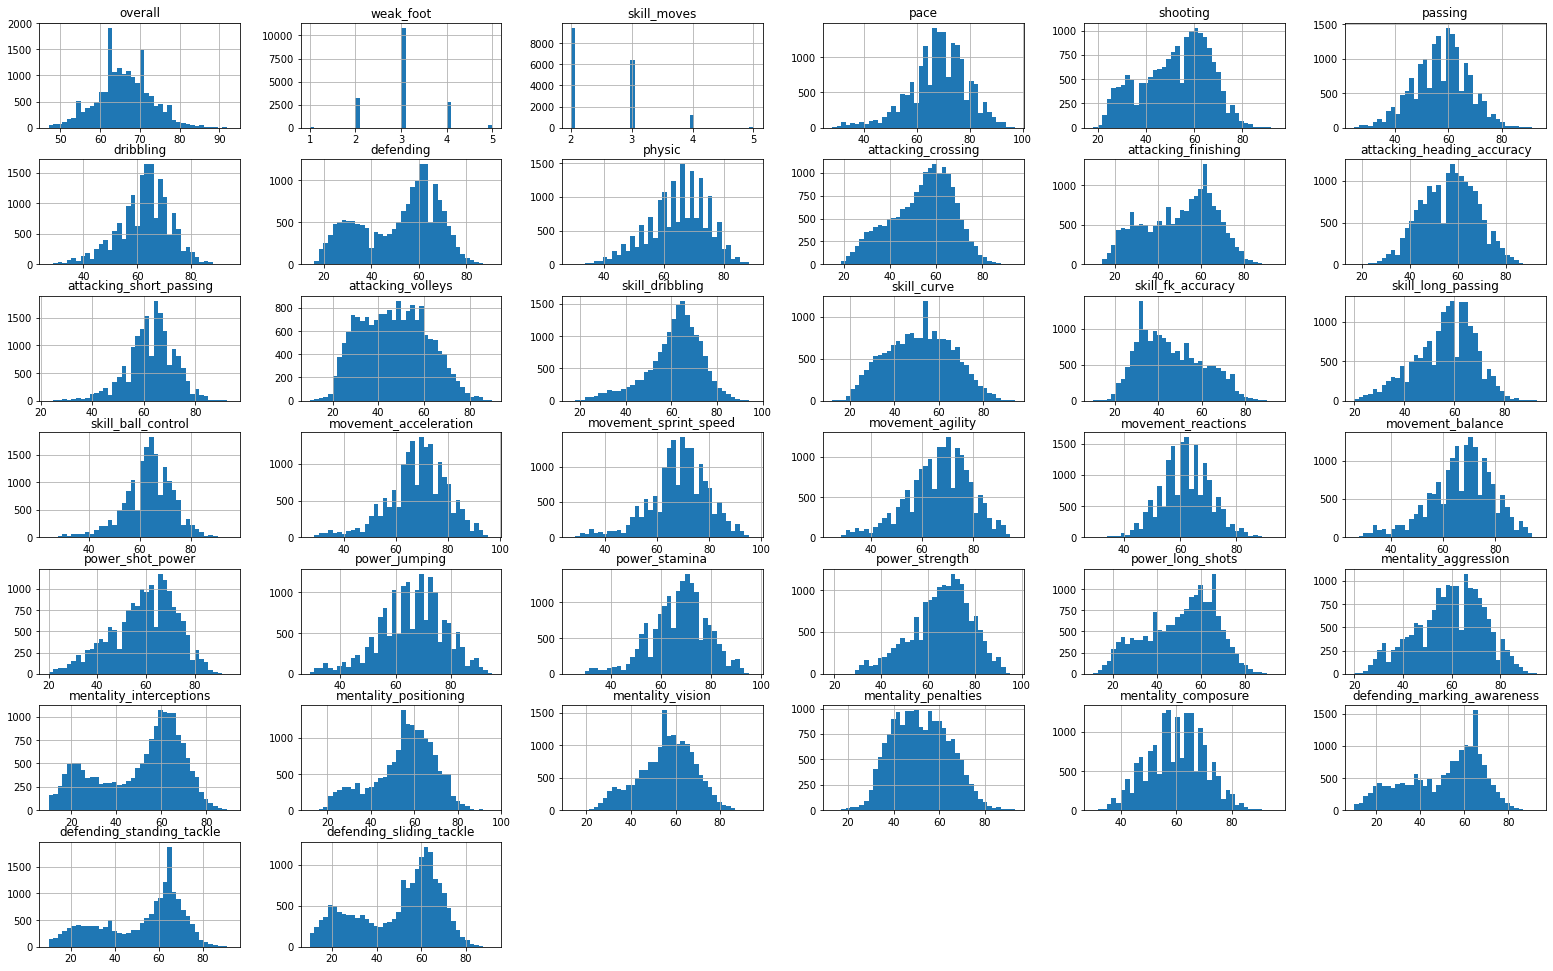

In [16]:
player_df.hist(bins=40, figsize=(27,17))
plt.show()

נבחין כי כל הנתונים מספריים ובין 1-99 ולכן אין צורך בנורמליזציה

In [17]:
player_df.dtypes

overall                          int64
weak_foot                        int64
skill_moves                      int64
pace                           float64
shooting                       float64
passing                        float64
dribbling                      float64
defending                      float64
physic                         float64
attacking_crossing               int64
attacking_finishing              int64
attacking_heading_accuracy       int64
attacking_short_passing          int64
attacking_volleys                int64
skill_dribbling                  int64
skill_curve                      int64
skill_fk_accuracy                int64
skill_long_passing               int64
skill_ball_control               int64
movement_acceleration            int64
movement_sprint_speed            int64
movement_agility                 int64
movement_reactions               int64
movement_balance                 int64
power_shot_power                 int64
power_jumping            

נציג את כמיות השחקנים לפי weak foot ו- skill moves

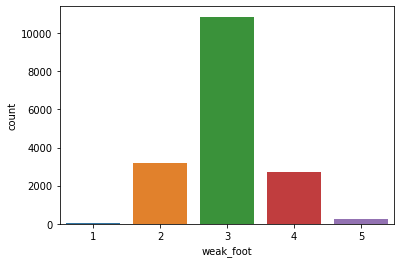

In [18]:
sns.countplot(player_df['weak_foot'])


In [19]:
player_data['weak_foot'].value_counts()

3    11500
2     3853
4     2778
5      291
1      116
Name: weak_foot, dtype: int64

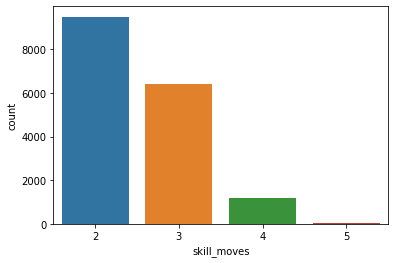

In [20]:
sns.countplot(player_df['skill_moves'])

In [21]:
player_data['skill_moves'].value_counts()

2    9481
3    6393
1    1431
4    1179
5      54
Name: skill_moves, dtype: int64

נבחין באופן יותר מעמיק בהתפלגות הרייטינג שלהשחקנים

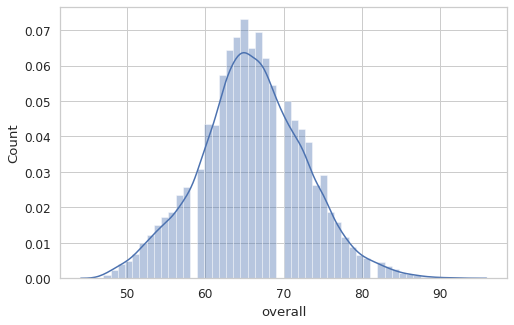

In [22]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(player_df['overall'], kde=True, bins=50).set(xlabel='overall', ylabel='Count');

In [23]:
player_df = player_df.astype('float64')

In [24]:
corr_matrix = player_df.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                        1.000000
movement_reactions             0.875507
mentality_composure            0.810361
attacking_short_passing        0.779922
skill_ball_control             0.763676
passing                        0.715001
dribbling                      0.666402
skill_long_passing             0.620898
skill_dribbling                0.572394
power_shot_power               0.569457
mentality_vision               0.557201
physic                         0.529234
attacking_crossing             0.526046
skill_curve                    0.518719
power_stamina                  0.508512
power_long_shots               0.499187
shooting                       0.489623
attacking_heading_accuracy     0.487199
mentality_aggression           0.480203
mentality_positioning          0.467537
skill_moves                    0.458354
attacking_volleys              0.452132
skill_fk_accuracy              0.445545
mentality_penalties            0.404144
attacking_finishing            0.395984


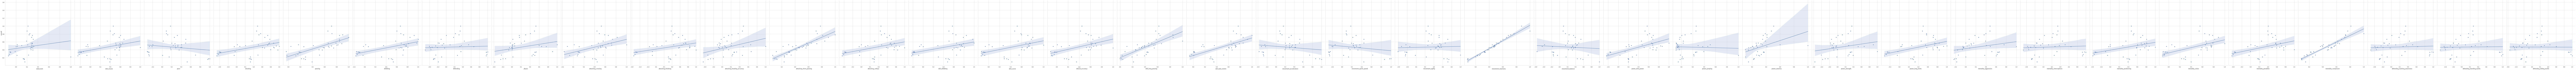

In [32]:
import seaborn as sns
sns.pairplot(corr_matrix,x_vars=corr_matrix.drop(['overall'], axis=1),y_vars= "overall",kind="reg", height=10)

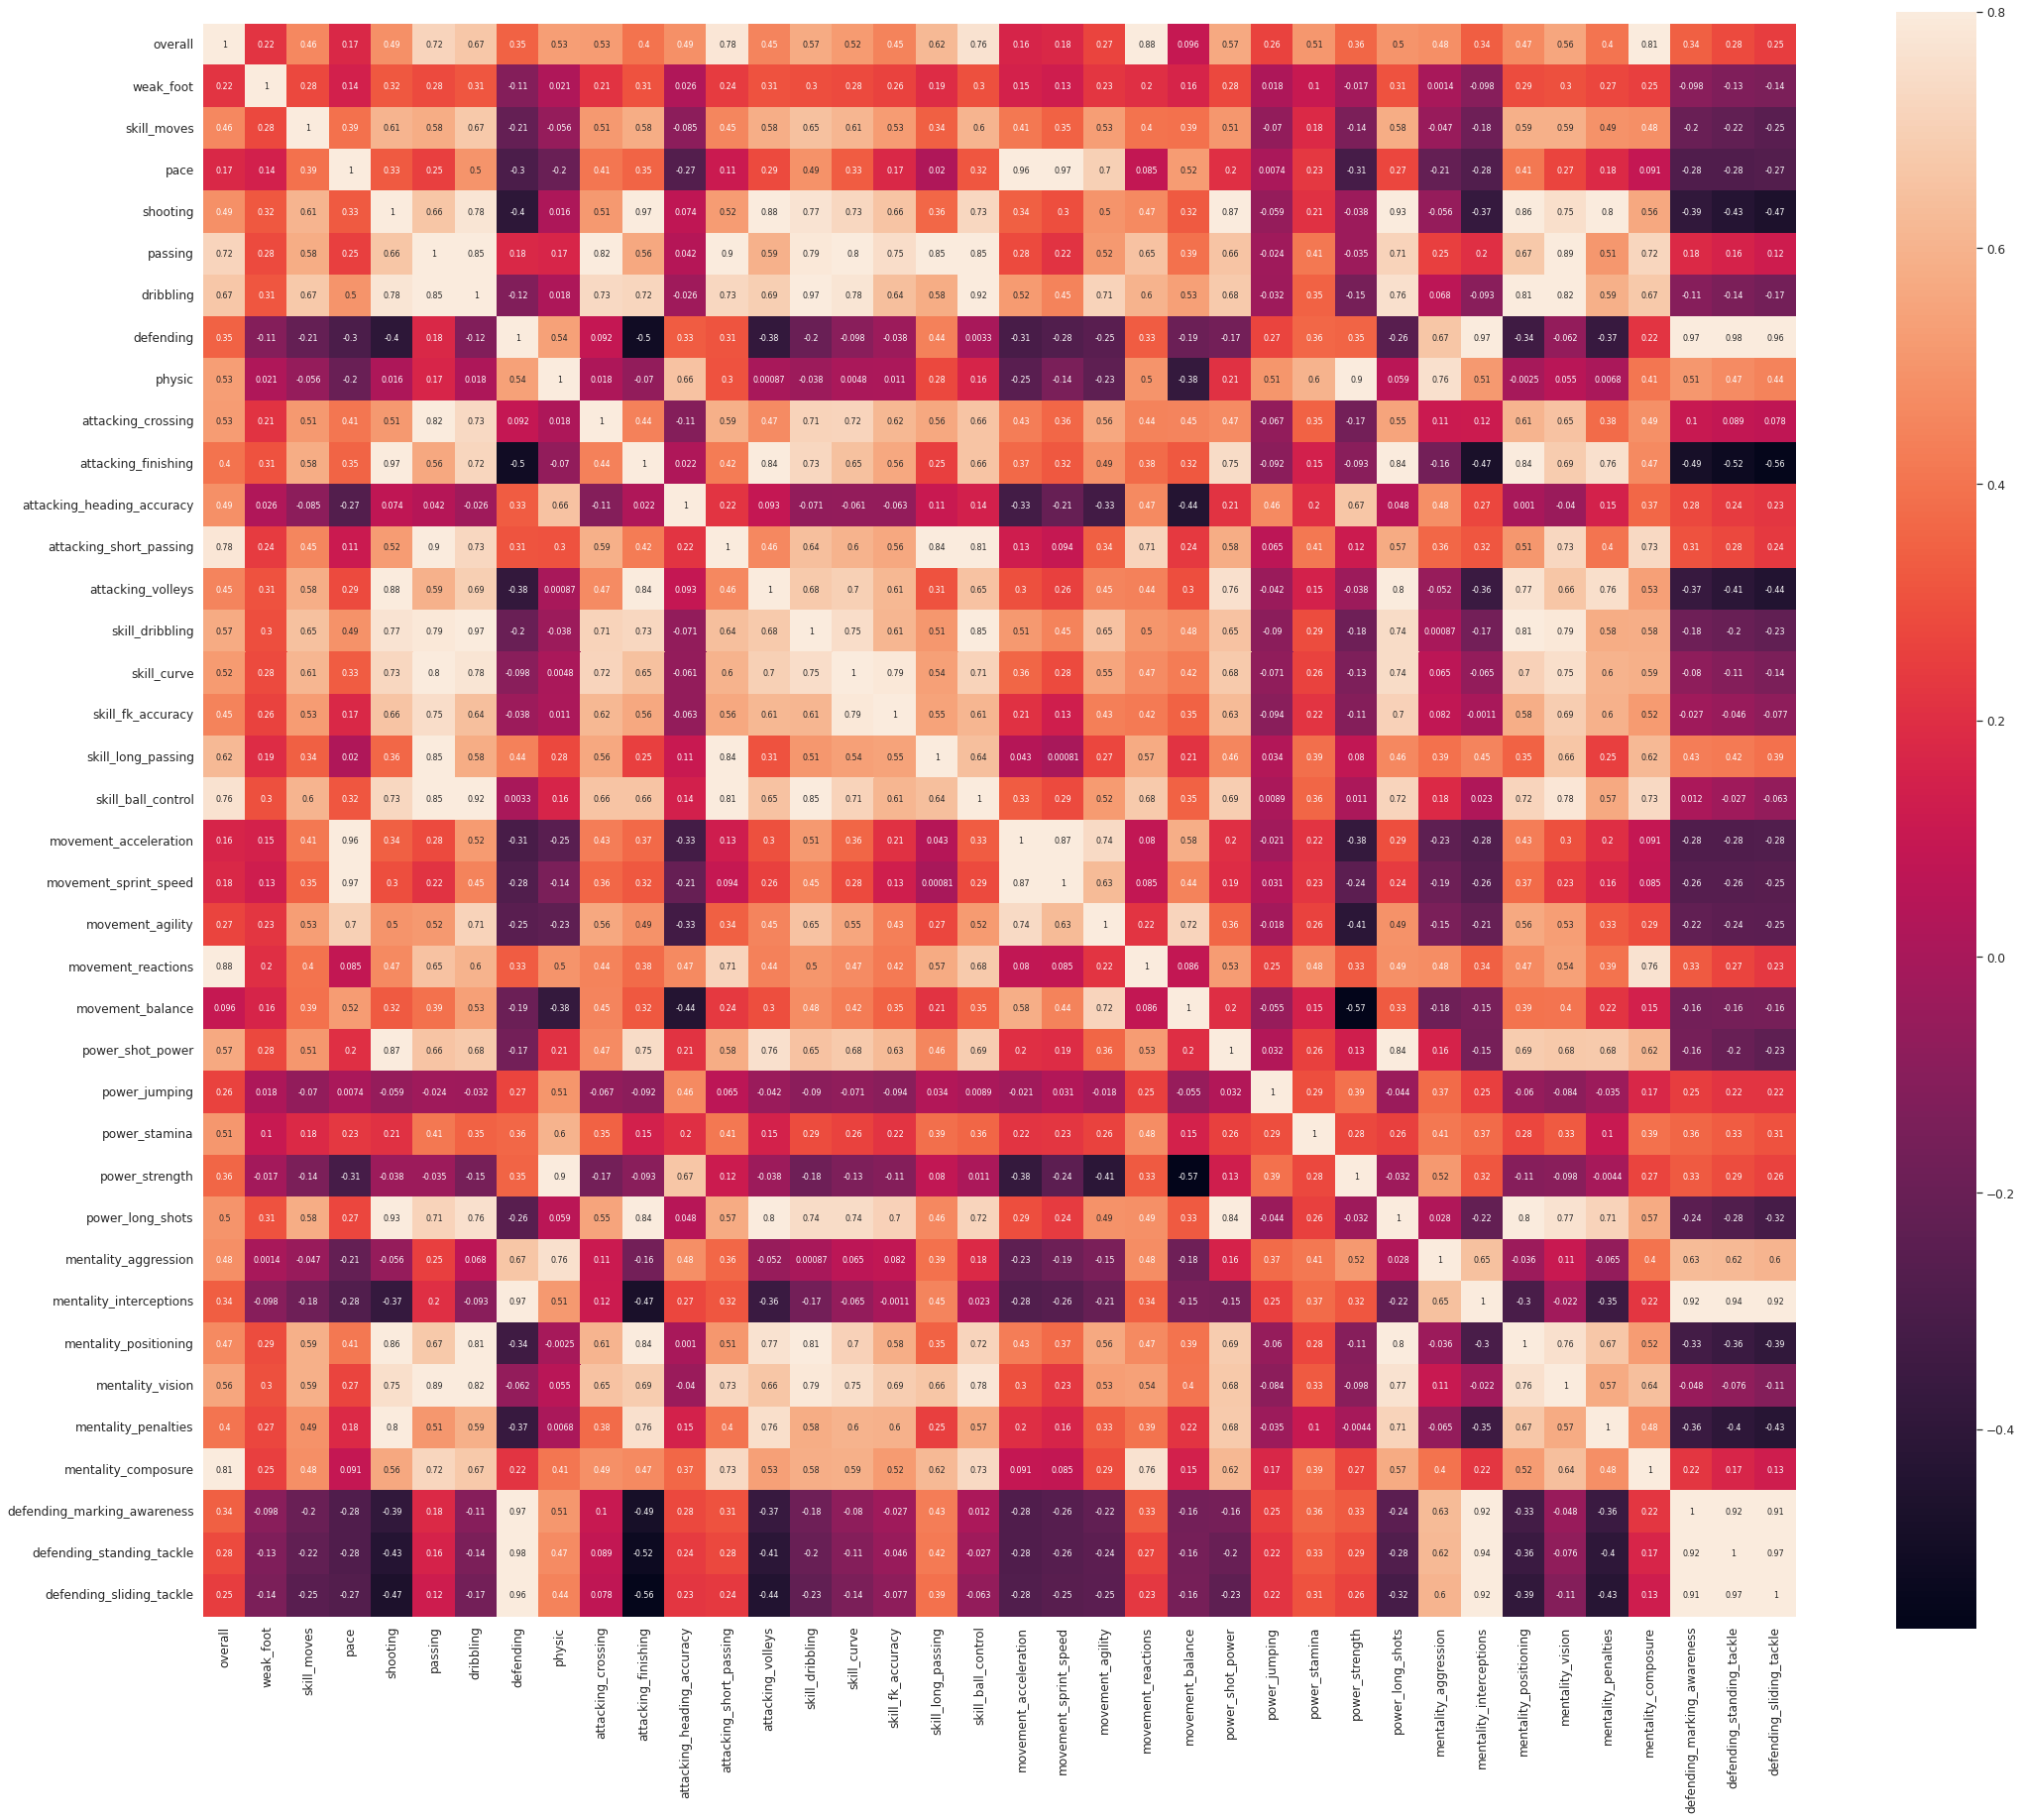

In [27]:
f,ax = plt.subplots(figsize=(36,30))
sns.heatmap(corr_matrix,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

נציג בעזרת scatter plot את ה5 קשרים החזקים ביותר:

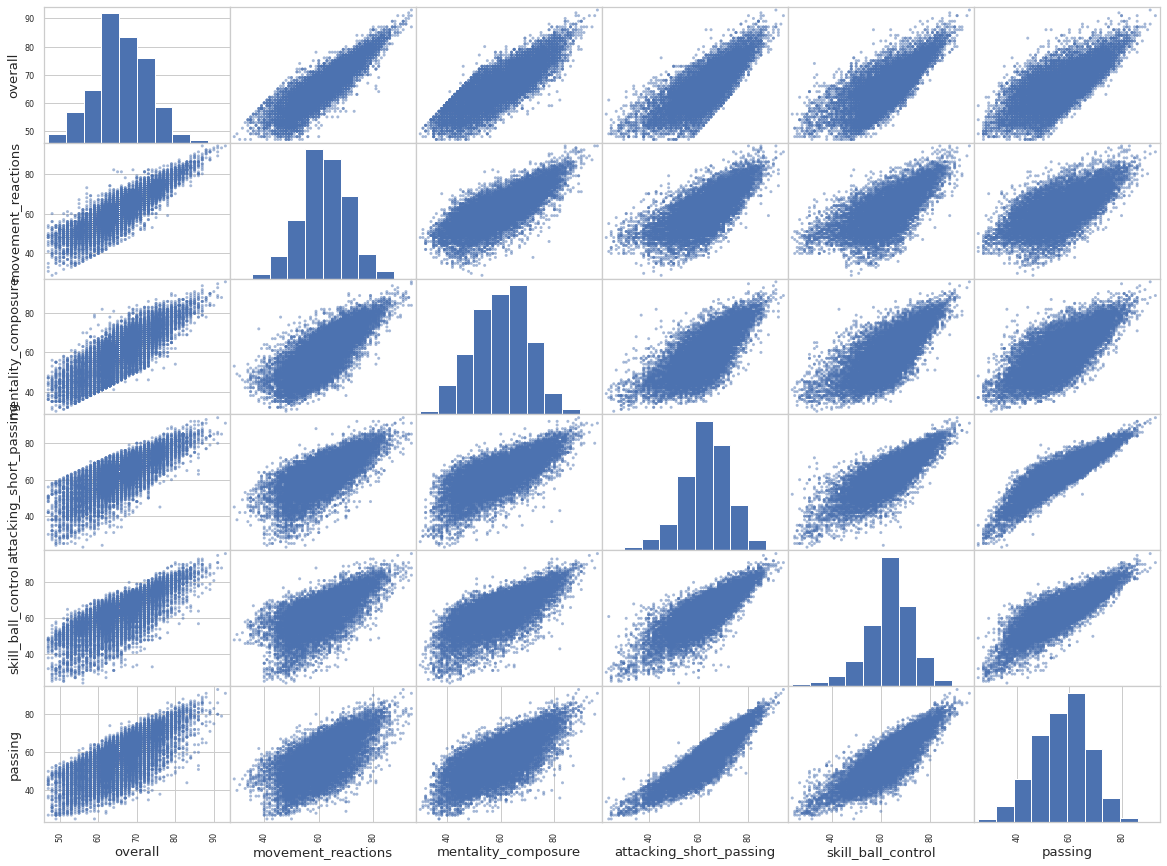

In [28]:
attributes = ['overall', 'movement_reactions', 'mentality_composure', 'attacking_short_passing', 'skill_ball_control', 'passing']
scatter_matrix(player_df[attributes], figsize=(20,15))
plt.show()

נציג באדום את הקשר החזק ביותר באופן לינארי

In [ ]:
player_df.plot(kind='scatter', x='movement_reactions', y='overall', alpha=0.1, color='red')
plt.show()

In [ ]:
train_set, test_set = train_test_split(player_df, test_size=0.2, random_state=42)

In [ ]:
y_train = train_set['overall'].to_numpy()
X_train = train_set.drop('overall', axis=1).to_numpy()
y_test = test_set['overall'].to_numpy()
X_test = test_set.drop('overall', axis=1).to_numpy()

##פונקציות עזר

###פונקצית display scores מציגה את התוצאה, הממוצע, וסטיית התקן

In [ ]:
def display_scores(scores):
  print("Scores:", scores,"\n")
  print("Mean:", scores.mean(),"\n")
  print("Standard Deviation:", scores.std())

###פונקצית ה midelview תציג על כל פרויקט את תוצאת המודל על נתוני הבדיקה ו את המדים RMSE ו Explained variance מטרת שתי הפונקציות הללו להקל

In [ ]:
def ModelView(reg,X_test,y_test,y_train,X_train):
    #score:
    print(f'reg score: {reg.score(X_test,y_test)}')

    print("------------------------------------------")
    print("------------------------------------------\n")

    #mean_squared_error:
    y_predictions = reg.predict(X_train)
    mse = mean_squared_error(y_train, y_predictions)
    rmse = np.sqrt(mse)
    print(f'The mean squared error: {rmse}')
    print("------------------------------------------")
    print("------------------------------------------\n")

    #cross validation mse:
    scores = cross_val_score(reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
    reg_scores = np.sqrt(-scores)
    display_scores(reg_scores)

    print("------------------------------------------")
    print("------------------------------------------\n")

    #Explained variance:

    print(f'Explained variance: {explained_variance_score(y_train, y_predictions)}')

    print("------------------------------------------")
    print("------------------------------------------\n")


    #cross validation Explained variance:


    scores = cross_val_score(reg, X_train, y_train,
    scoring='explained_variance', cv=10)
    display_scores(scores)    

#LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
ModelView(lin_reg,X_test,y_test,y_train,X_train)

#KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

In [ ]:
ModelView(knn_reg,X_test,y_test,y_train,X_train)

#SVR

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

In [ ]:
ModelView(svr_reg,X_test,y_test,y_train,X_train)

#MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

In [ ]:
ModelView(mlp_reg,X_test,y_test,y_train,X_train)

# Hyper Parameter Tuning

אבצע מיטוב נתונים בעזרת הקוד הנ"ל.
אריץ בפאיצארם בגלל שזה מריץ חזק יותר

```
from sklearn.model_selection import GridSearchCV


estimator=MLPRegressor(1000)


param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd', 'lbfgs']}

gsc = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
gsc.fit(X_train, y_train)```



In [ ]:
regressor = MLPRegressor(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (50, 50, 50), learning_rate = 'constant', solver = 'adam', max_iter = 1000)
regressor.fit(X_train, y_train)

In [ ]:
ModelView(regressor,X_test,y_test,y_train,X_train)

#Save model as pickle

In [ ]:
with open('Final_Model_Player.pkl', 'wb') as file:
    pickle.dump(regressor, file)